# Dirac Notation Implementation - DEMO

2024-03-01

## Set up the environment

In [1]:
from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wl, wlexpr
session = WolframLanguageSession()

In [2]:
from diracdec import *
from diracdec import dirac_bigop_delta_trs, label_trs
trs = dirac_bigop_delta_trs + label_trs

In [3]:
sub = parse('''
{
        ket0 : KET('0');
        bra0 : BRA('0');
        ket1 : KET('1');
        bra1 : BRA('1');
        ketP :  "Sqrt[1/2]" SCR (ket0 ADD ket1) ;
        braP :  "Sqrt[1/2]" SCR (bra0 ADD bra1) ;
        ketM :  "Sqrt[1/2]" SCR (ket0 ADD ("-1" MLTK ket1)) ;
        braM :  "Sqrt[1/2]" SCR (bra0 ADD ("-1" MLTB bra1)) ;

        beta00 :  "Sqrt[1/2]" SCR ((ket0 TSRK ket0) ADD (ket1 TSRK ket1));

        I2 : (ket0 OUTER bra0) ADD (ket1 OUTER bra1);

        Z : (ket0 OUTER bra0) ADD ("-1" SCR (ket1 OUTER bra1));

        X : (ket0 OUTER bra1) ADD (ket1 OUTER bra0);

        Y : ("-I" SCR (ket0 OUTER bra1)) ADD ("I" SCR (ket1 OUTER bra0));


        H :  "Sqrt[1/2]" SCR ((ket0 OUTER bra0) ADD (ket0 OUTER bra1) ADD (ket1 OUTER bra0) ADD ("-1" SCR (ket1 OUTER bra1)));

        CX :  ((ket0 TSRK ket0) OUTER (bra0 TSRB bra0))
                    ADD ((ket0 TSRK ket1) OUTER (bra0 TSRB bra1)) 
                    ADD ((ket1 TSRK ket1) OUTER (bra1 TSRB bra0))
                    ADD ((ket1 TSRK ket0) OUTER (bra1 TSRB bra1));

        CZ :  ((ket0 TSRK ket0) OUTER (bra0 TSRB bra0))
                    ADD ((ket0 TSRK ket1) OUTER (bra0 TSRB bra1)) 
                    ADD ((ket1 TSRK ket0) OUTER (bra1 TSRB bra0))
                    ADD ("-1" SCR ((ket1 TSRK ket1) OUTER (bra1 TSRB bra1)));
        }
          ''').get_idempotent()


In [4]:
print(sub)

┌───────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│                                                                                                           │
│        ⎛   1                    ⎞                                                                         │
│ ketM ↦ ⎜-------.(|0> + (-1·|1>))⎟                                                                         │
│        ⎝Sqrt[2]                 ⎠                                                                         │
│                                                                                                           │
│ ket0 ↦ |0>                                                                                                │
│                                                                                                           │
│          ⎛   1                           ⎞                                                                │
│ beta00 ↦

## Examples with label

### 1

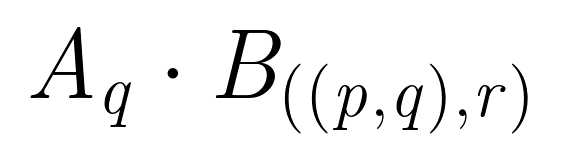

In [5]:
a = parse(''' A[q] MLTOL B[PAIRR(PAIRR(p, q), r)]''')
a.render_tex()

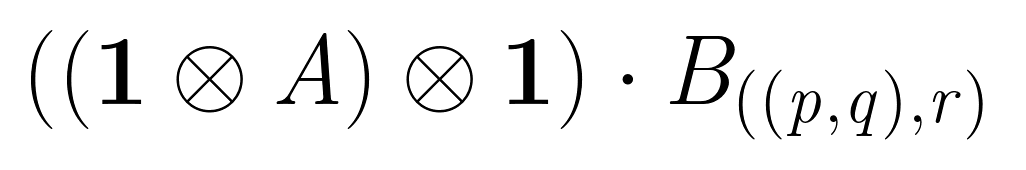

In [6]:
trs.normalize(a).render_tex()

### 2

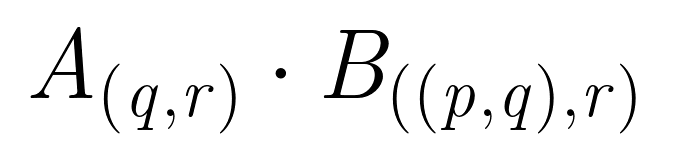

In [7]:
a = parse(''' A[PAIRR(q, r)] MLTOL B[PAIRR(PAIRR(p, q), r)]''')
a.render_tex()

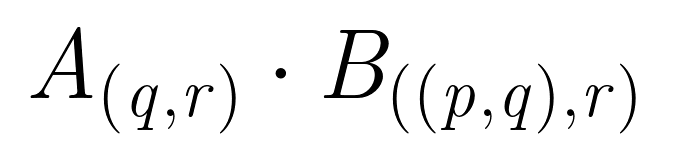

In [8]:
trs.normalize(a).render_tex()

### 3

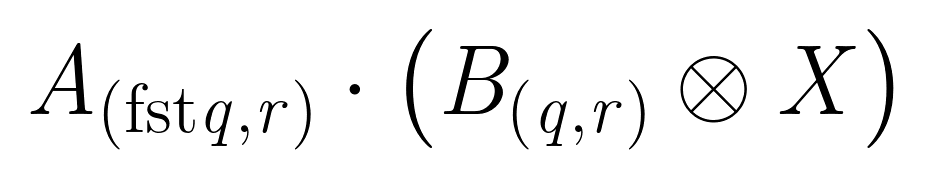

In [9]:
a = parse(''' A[PAIRR(FSTR(q), r)] MLTOL (B[PAIRR(q, r)] TSROL X)''')
a.render_tex()

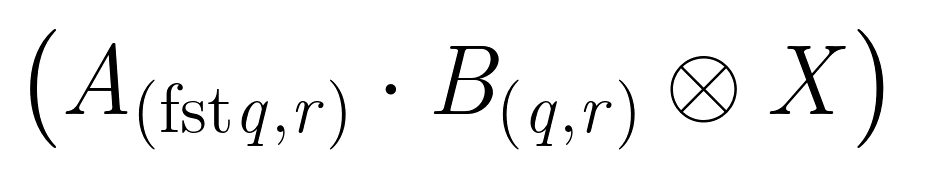

In [10]:
trs.normalize(a).render_tex()

### 4

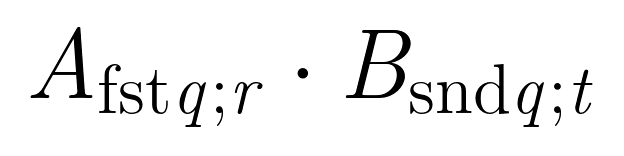

In [11]:
a = parse(''' A[FSTR(q); r] MLTOL B[SNDR(q); t]''')
a.render_tex()

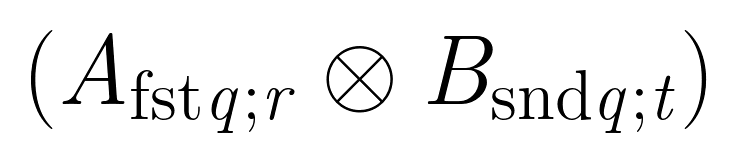

In [12]:
trs.normalize(a).render_tex()

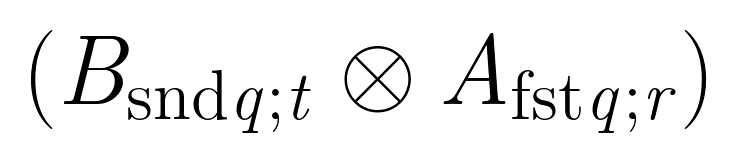

In [13]:
c = parse(''' (B[SNDR(q); t]) TSROL (A[FSTR(q); r]) ''')
c.render_tex()

In [14]:
assert trs.normalize(a) == c

## Examples

### Operation on Maximally Entangled State

For all $A$,
$$
A_{S} \ket{\Phi}_{S, T} = A^\top_{T} \ket{\Phi}_{S, T}
$$
where
$$
\ket{\Phi} = \sum_{i}\ket{i}\ket{i}
$$

In [15]:
a = parse(''' 
                (
                    
                   (SUM(i, KET(i) OUTERL BRA(i))[S]) MLTOL (A[S])
                ) 
                MLTKL 
                (
                    SUM(i, KET(PAIR(i, i))[PAIRR(S, T)])
                ) 
            ''')

b = parse(''' 
                (
                    (SUM(i, KET(i) OUTERL BRA(i))[T]) MLTOL (TP(A)[T])
                ) 
                MLTKL 
                (
                    SUM(i, KET(PAIR(i, i))[PAIRR(S, T)])
                ) 
            ''')

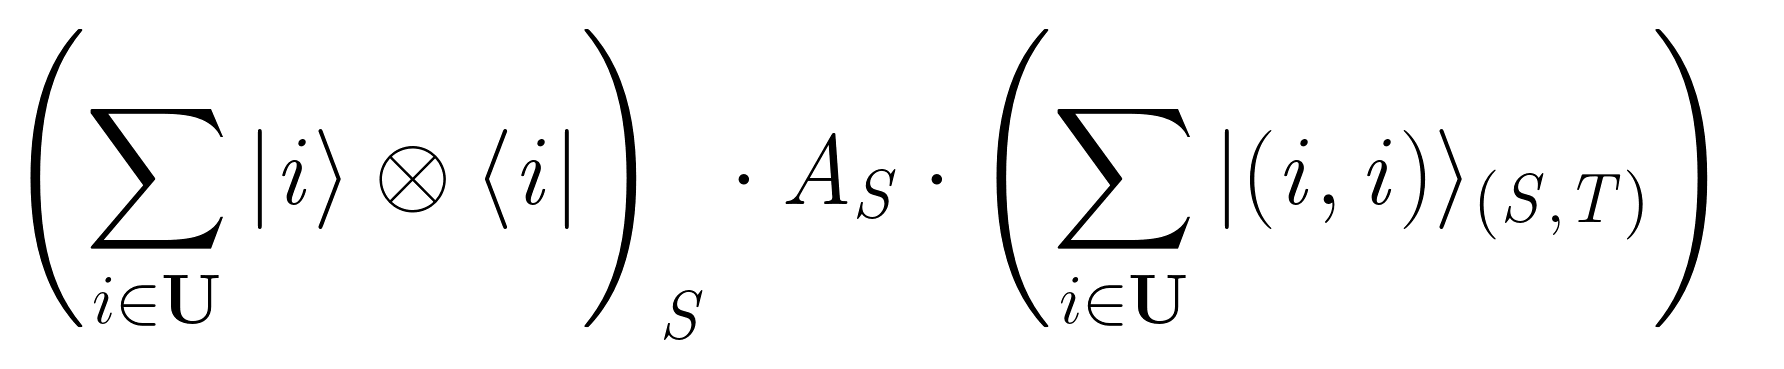

In [16]:
a.render_tex()

In [17]:
print(repr(a))

((LABELLED1(Sum(((i, USET),), (KET(i) OUTERL BRA(i))), S) MLTOL LABELLED1(A, S)) MLTKL Sum(((i, USET),), LABELLED1(KET(PAIR(i, i)), PAIRR(S, T))))


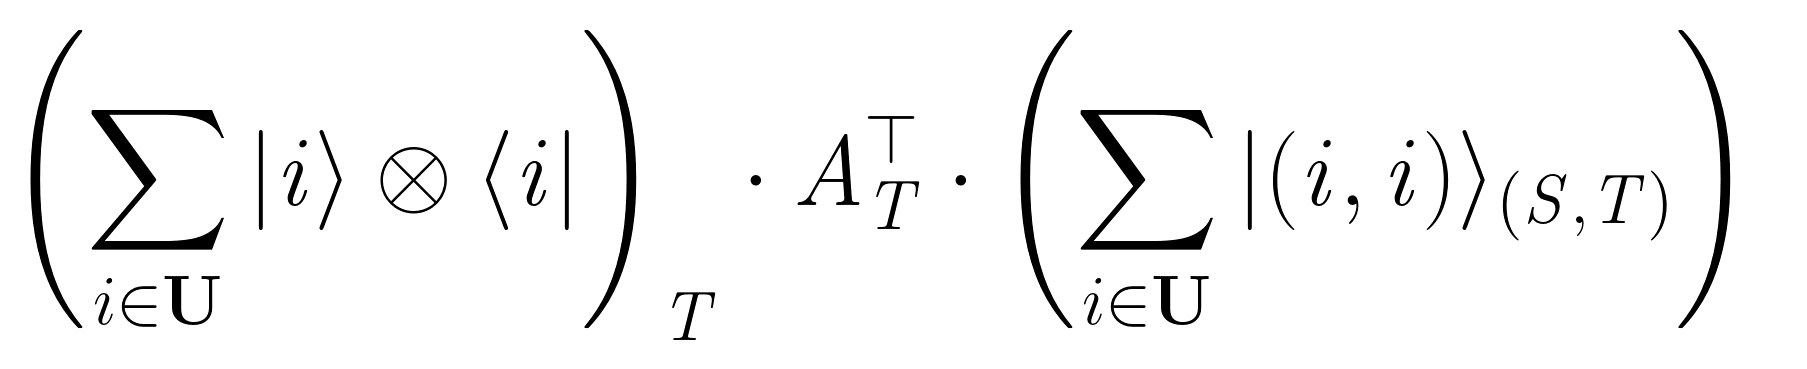

In [18]:
b.render_tex()

In [19]:
norm_a = trs.normalize(a)
norm_b = trs.normalize(b)

assert trs.normalize(juxt(norm_a)) == trs.normalize(juxt(norm_b))

AssertionError: 

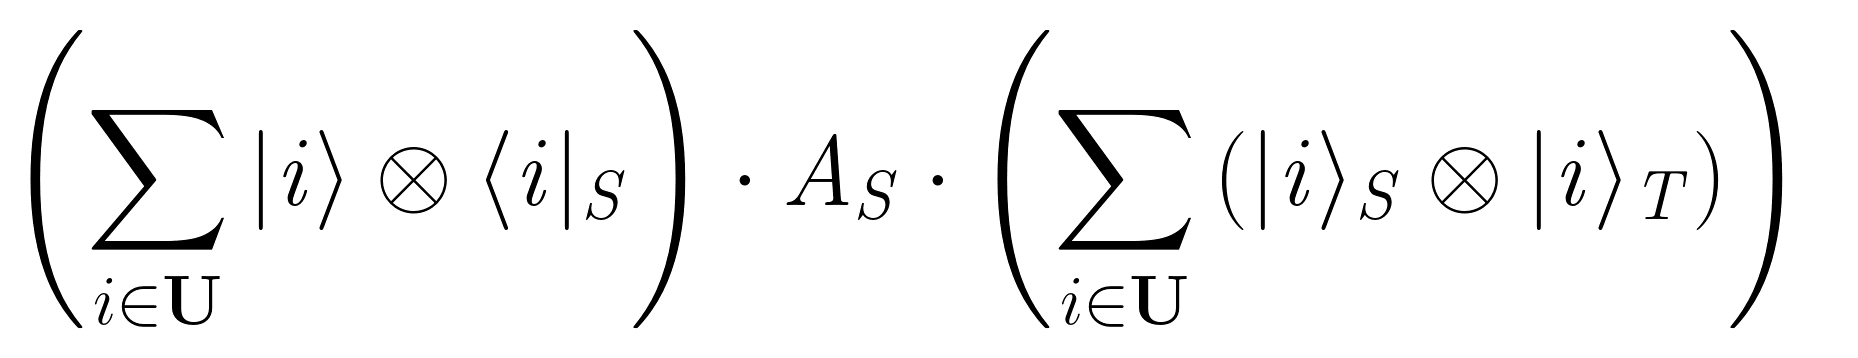

In [20]:
trs.normalize(a).render_tex()

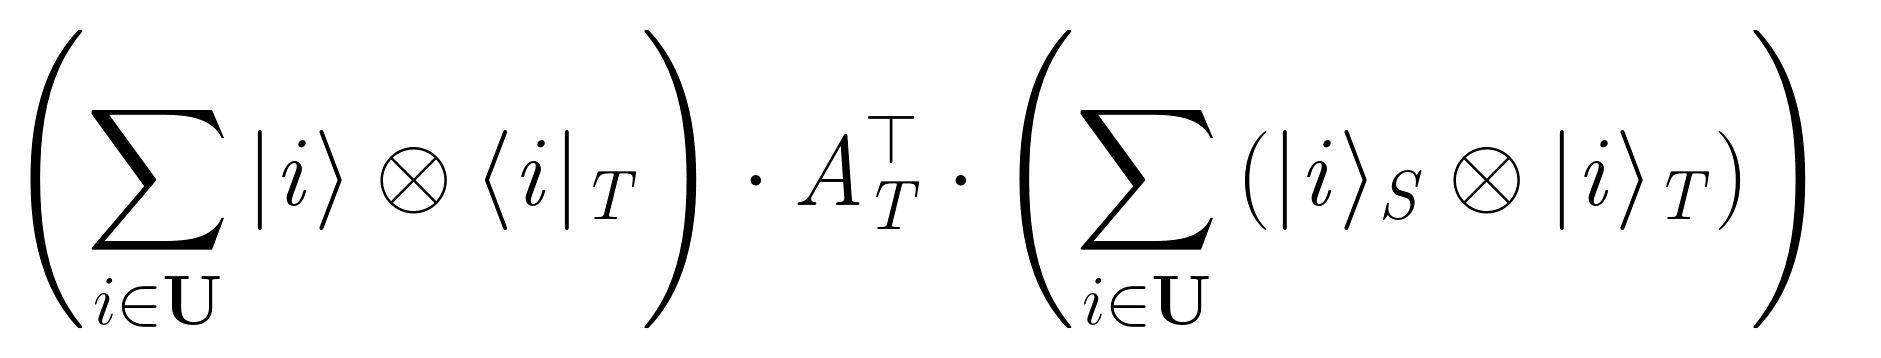

In [21]:
trs.normalize(b).render_tex()

### abstraction and application: Choi representation

In [22]:
choi_sub = Subst({
"choi" : parse(r''' 
FUN A . SUM(i, 
            SUM(j, 
                (BRA(i) DOT (A MLTK KET(j)))
                SCR KET(PAIR(i,j))
            )    
        ) '''),
"unchoi" : parse(r'''
FUN A . SUM(i,
            SUM(j,
                (BRA(PAIR(i, j)) DOT A)
                SCR (KET(i) OUTER BRA(j))
                )
        )''')
}).get_idempotent()

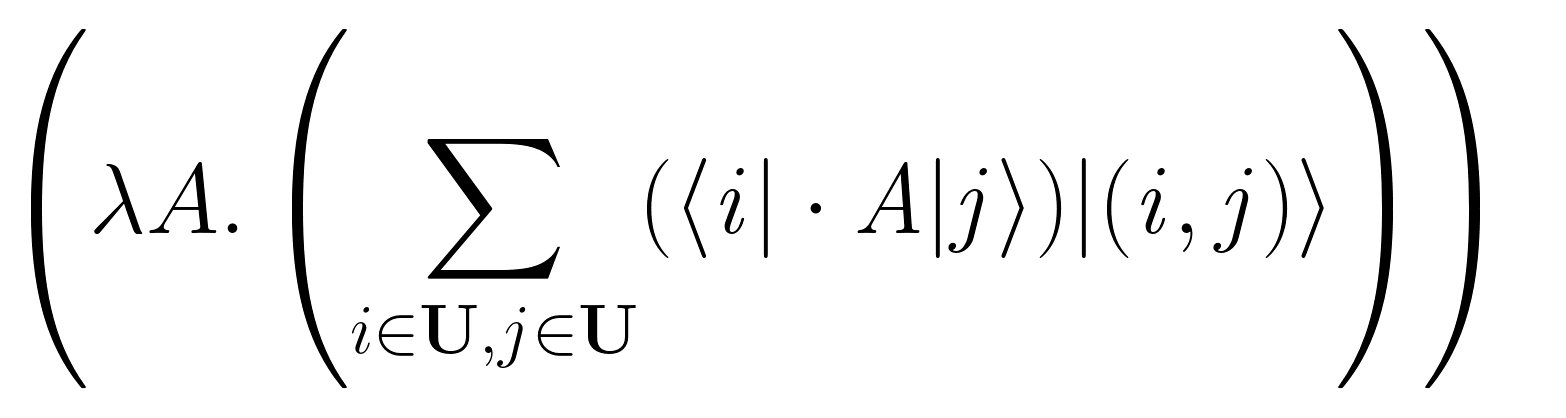

In [ ]:
a = choi_sub(parse(r'''choi'''))
a.render_tex()

In [ ]:
print(a)

⎛         __                              ⎞
⎜         \                               ⎟
⎜λ A.     /       ((<i|·(A·|j>)).|(i, j)>)⎟
⎜         ‾‾                              ⎟
⎝    i ∈ 𝐔, j ∈ 𝐔                         ⎠


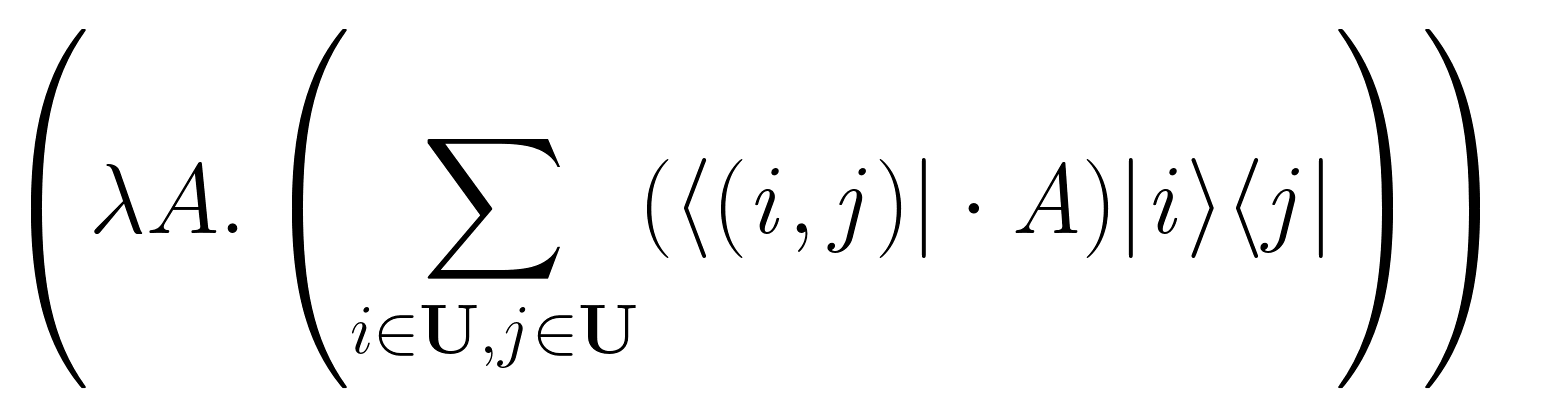

In [ ]:
b = choi_sub(parse(r'''unchoi'''))
b.render_tex()

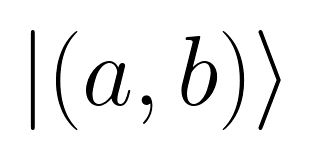

In [ ]:
a_ = choi_sub(parse(r''' choi @ (KET('a') OUTER BRA('b')) '''))
trs.normalize(a_).render_tex()

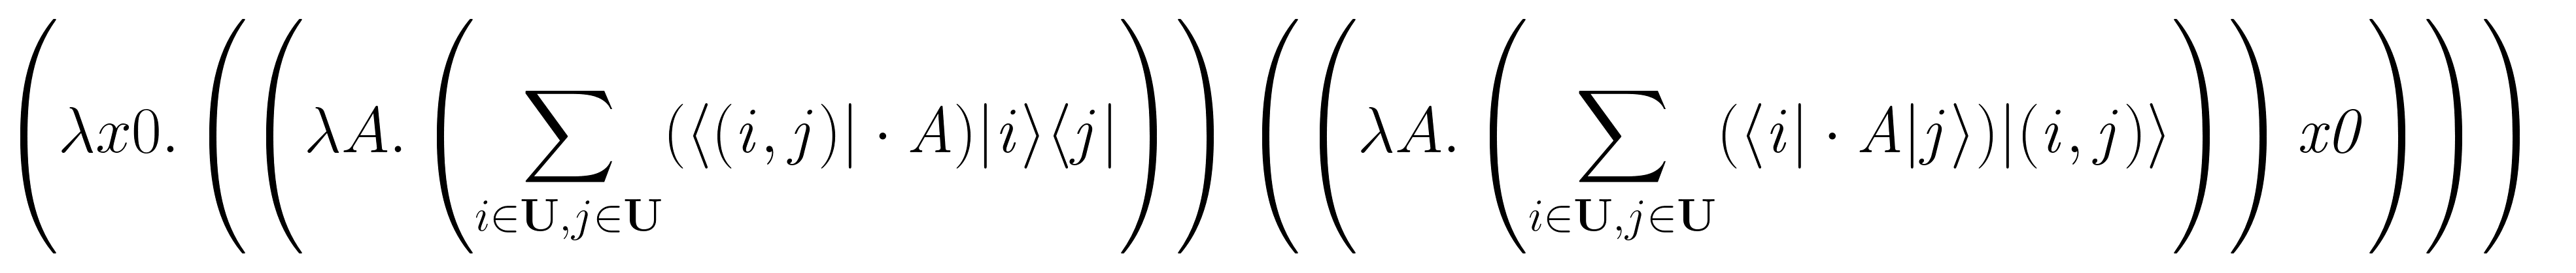

In [ ]:
c = choi_sub(parse(r'''FUN A . unchoi @ (choi @ A) '''))
c.render_tex()

In [ ]:
trs.normalize(c, verbose=True)

Renaming rule variables...
== STEP 1 ==
Current Term:
⎛     ⎛         __                              ⎞ ⎛         __                              ⎞   ⎞
⎜     ⎜         \                               ⎟ ⎜         \                               ⎟   ⎟
⎜λ x0.⎜λ A.     /       ((<(i, j)|·A).(|i>⊗<j|))⎟ ⎜λ A.     /       ((<i|·(A·|j>)).|(i, j)>)⎟ x0⎟
⎜     ⎜         ‾‾                              ⎟ ⎜         ‾‾                              ⎟   ⎟
⎝     ⎝    i ∈ 𝐔, j ∈ 𝐔                         ⎠ ⎝    i ∈ 𝐔, j ∈ 𝐔                         ⎠   ⎠

┌apply BETA-REDUCTION────────────────────────────────────────────────────────────────────┐
│⎛         __                              ⎞            __                               │
│⎜         \                               ⎟            \                                │
│⎜λ A.     /       ((<i|·(A·|j>)).|(i, j)>)⎟ x0 ->      /       ((<i|·(x0·|j>)).|(i, j)>)│
│⎜         ‾‾                              ⎟            ‾‾                               │


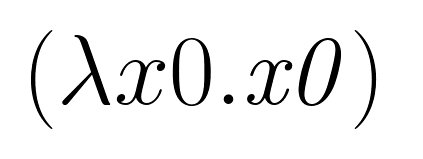

In [ ]:
entry_trs.normalize(trs.normalize(c)).render_tex()